# EEE3314-02, Introduction Artificial Intelligence
# Lecture 5. Object Detection

In [2]:
import torch

#1. Intersection over Union (IoU)
Prediction box와 그에 해당하는 GT box 간의 겹쳐진 비율을 구하는 것


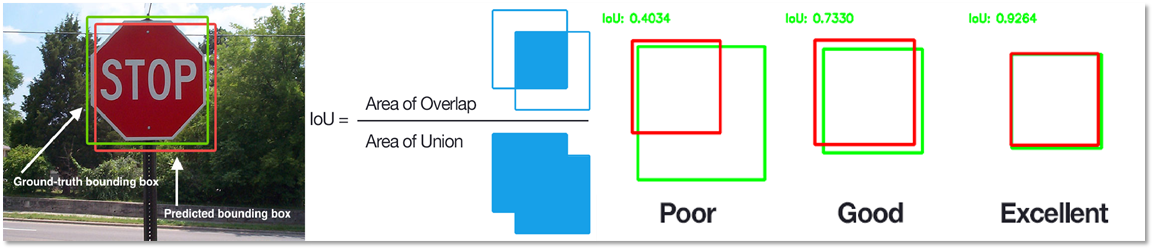

#**Assignment 5-1**

#***calculate_iou*** 함수 구현하기
GT box N개와 그것을 예측한 prediction box N개를 input으로 받아 N개의 IoU를 구하기


***입력 변수*** \
boxes_pred (tensor): predicted boxes (N, 4) \
boxes_label (tensor): Ground truth boxes (N, 4) \
box_type (str): 'midpoint' (x,y,w,h) or 'corner' (x1,y1,x2,y2) \
\
***출력 변수*** \
results (tensor): intersection over union between boxes (N)

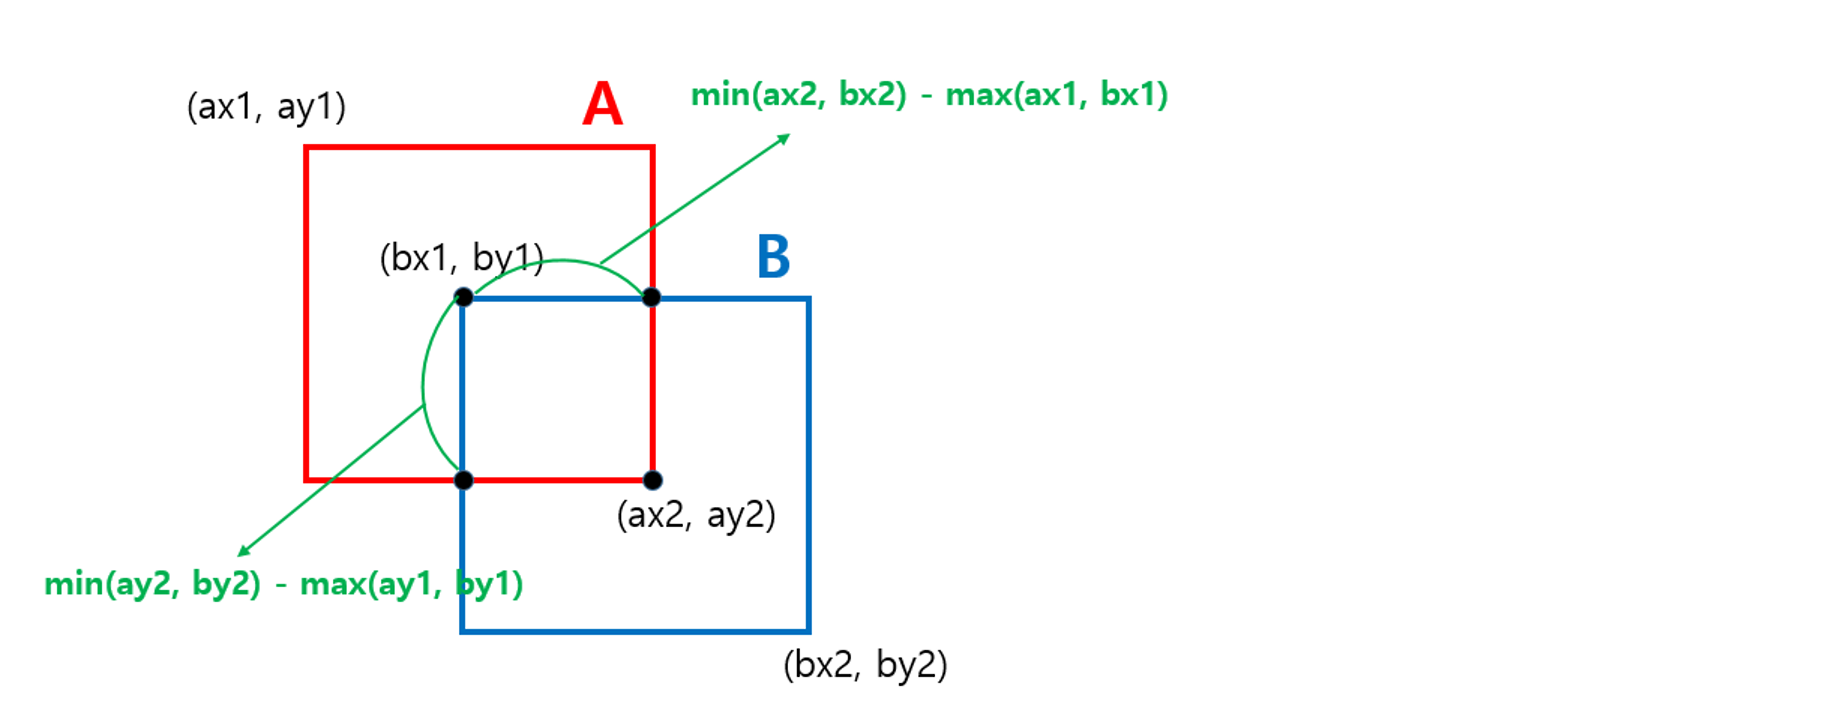

In [4]:
def calculate_iou(boxes_pred, boxes_label, box_type="midpoint"):
    """
    GT box N개와 그것을 예측한 prediction box N개를 input으로 받아 N개의 IoU를 구하기

    ***입력 변수***
    boxes_pred (tensor): predicted boxes (N, 4)
    boxes_label (tensor): Ground truth boxes (N, 4)
    box_type (str): 'midpoint' (x,y,w,h) or 'corner' (x1,y1,x2,y2)
    ***출력 변수***
    results (tensor): intersection over union between boxes (N)
    """
    # matrix dimension을 유지하기 위해서 idx:idx+1으로 slicing
    # dimension이 더 추가될 수 있기 때문에 ... 으로 indexing을 해 준다.
    # ex) Yolo 에서는 matrix dimension이 (N, S, S, 4) 로 4-dimensional
    if box_type == "midpoint":
        box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
        box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
        box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
        box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
        box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
        box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
        box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
        box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2

    elif box_type == "corners":
        box1_x1 = boxes_preds[..., 0:1]
        box1_y1 = boxes_preds[..., 1:2]
        box1_x2 = boxes_preds[..., 2:3]
        box1_y2 = boxes_preds[..., 3:4]
        box2_x1 = boxes_labels[..., 0:1]
        box2_y1 = boxes_labels[..., 1:2]
        box2_x2 = boxes_labels[..., 2:3]
        box2_y2 = boxes_labels[..., 3:4]

    ### implement your code here ###
    """
    사용변수: box1_x1, box1_x2, box1_y1, box1_y2, 
              box2_x1, box2_x2, box2_y1, box2_y2, 
    1. intersection 계산 (박스가 겹치지 않는 경우 0으로 처리)
    2. Union 계산 (박스가 겹치지 않는 경우 1e-6으로 처리)
    3. intersection / Union
    """
    ###

    return results

i번째 prediction box 및 ground truth box를 그리고 IoU 값 구하기

In [5]:
N = 10

pred = torch.randint(low=50, high=100, size=(N,4))
true = torch.randint(low=50, high=100, size=(N,4))
# a = torch.Tensor([[100,100,100,100]])
# b = torch.Tensor([[100,100,80,150]])
print(f"coordinates of pred: {pred.numpy()}")
print(f"coordinates of true: {true.numpy()}")

coordinates of pred: [[53 70 79 70]
 [83 87 77 65]
 [80 70 83 67]
 [92 79 79 99]
 [93 67 79 61]
 [76 78 86 65]
 [63 90 54 86]
 [69 73 61 55]
 [51 74 85 52]
 [70 68 62 70]]
coordinates of true: [[95 86 59 98]
 [59 52 51 68]
 [62 67 52 78]
 [84 54 91 90]
 [63 90 69 56]
 [53 96 57 52]
 [66 75 67 74]
 [84 60 60 51]
 [75 76 80 81]
 [89 57 97 97]]


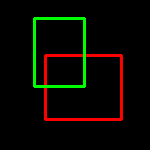

NameError: ignored

In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

box_index = 1
a_coordinate = pred.numpy()[box_index].astype(np.int16)
b_coordinate = true.numpy()[box_index].astype(np.int16)

a_x1 = a_coordinate[0] - a_coordinate[2] // 2
a_x2 = a_coordinate[0] + a_coordinate[2] // 2
a_y1 = a_coordinate[1] - a_coordinate[3] // 2
a_y2 = a_coordinate[1] + a_coordinate[3] // 2

b_x1 = b_coordinate[0] - b_coordinate[2] // 2
b_x2 = b_coordinate[0] + b_coordinate[2] // 2
b_y1 = b_coordinate[1] - b_coordinate[3] // 2
b_y2 = b_coordinate[1] + b_coordinate[3] // 2

a_color = (0,0,255) # red
b_color = (0,255,0) # green

img = np.zeros((150,150,3), np.uint8)
img = cv2.rectangle(img, (a_x1, a_y1), (a_x2, a_y2), a_color, 2)
img = cv2.rectangle(img, (b_x1, b_y1), (b_x2, b_y2), b_color, 2)

cv2_imshow(img)
print(f"IoU between {box_index}-th boxes: {calculate_iou(pred,true).numpy()[box_index]}")

#2. Non-maximum Suppression (NMS)
같은 class에 속하는 박스들 중, IoU가 일정 이상인 박스를 제거하고, 가장 probability score가 높은 박스를 남기는 것

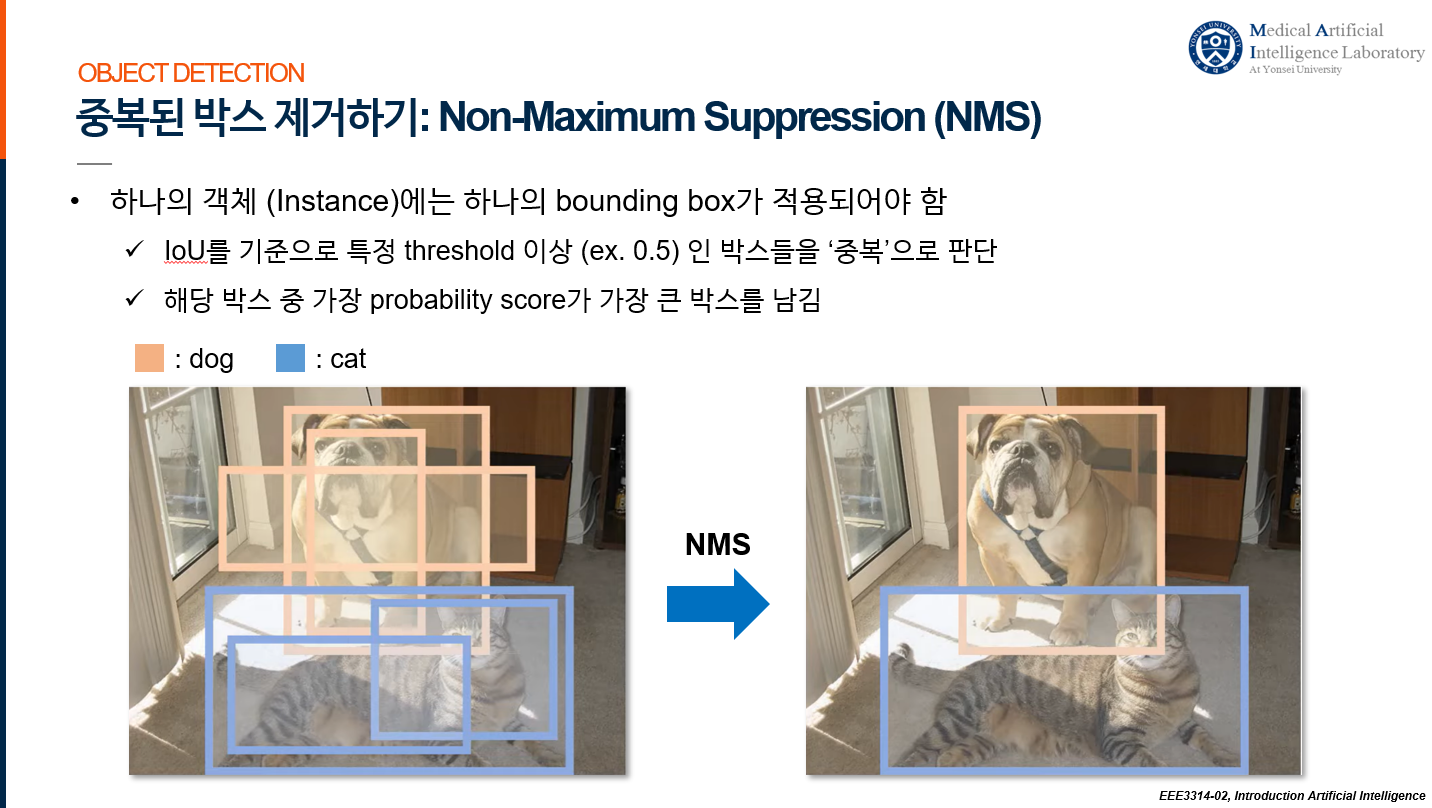

#**Assignment 5-2**

#***nms*** 함수 구현하기
N개 box로 구성된 bboxes (클래스 개수는 총 C개, C <= N) 및 iou_threshold, prob_threshold를 입력으로 받아 nms 알고리즘을 적용한 bboxes를 출력하기 \

***입력 변수*** \
bboxes (list): [class, class_prob, x, y, w, h] (list)로 이루어진 list (ex. [0, 0.5, 50, 50, 50, 50]) \
iou_threshold (float): 두 박스의 중복 여부를 판단하기 위한 iou의 threshold. iou가 iou_threshold 이상이면 중복이라 판단 (0 에서 1) \
prob_threshold (float): 예측한 박스의 class_prob이 이 이하이면 제거 (0 에서 1) \
box_type (str): 'midpoint' (x,y,w,h) or 'corner' (x1,y1,x2,y2) \
\
***출력 변수*** \
bboxes_after_nms (list): bboxes와 같은 형태의 list (nms를 통해서 중복된 박스들이 제거된)

In [ ]:
def nms(bboxes, iou_threshold, prob_threshold, box_type="midpoint"):
    """
    입력된 bounding boxes 들에 대하여 Non Maximum Suppression를 수행
    N개 box로 구성된 bboxes 및 iou_threshold, prob_threshold를 입력으로 받아 nms 알고리즘을 적용한 bboxes를 출력하기

    ***입력 변수***
    bboxes (list): [class, class_prob, x, y, w, h] (list)로 이루어진 list
    iou_threshold (float): 두 박스의 중복 여부를 판단하기 위한 iou의 threshold. iou가 iou_threshold 이상이면 중복이라 판단 (0 에서 1)
    prob_threshold (float): 예측한 박스의 class_prob이 이 이하이면 제거 (0 에서 1)
    box_type (str): 'midpoint' (x,y,w,h) or 'corner' (x1,y1,x2,y2)
    
    ***출력 변수***
    bboxes_after_nms (list): bboxes와 같은 형태의 list (nms를 통해서 중복된 박스들이 제거된)
    """
    assert type(bboxes) == list

    # class_prob가 prob_threshold 보다 낮은 box 제거하기
    bboxes = [box for box in bboxes if box[1] > prob_threshold]

    # class_prob 기준으로 내림차순 정렬 (이후 iou가 낮은 것을 제거하기 위해서)
    bboxes = sorted(bboxes, key=lambda x: x[1], reverse=True)
    bboxes_nms = []

    # bbox에 더이상 box가 남지 않을 때 까지,
    while bboxes:
        # box를 위에서 부터 하나씩 꺼내옴
        chosen_box = bboxes.pop(0)

        ### implement your code here ###
        """
        bboxes (list형)에 남아있는 box 중에서, (1) chosen_box와 다른 class 에 속하는 box 또는 (2) chosen_box와 비교했을 때, iou가 낮은 box 만을 남긴다.
        hints:
          bboxes에서 고른 박스를 sampled_box라고 할 때,
          sampled_box가 chosen_box와 다른 class에 속하는지 확인하기 -> sampled_box[0] != chosen_box[0]
          sampled_box와 chosen_box간의 iou 구하기 -> calculate_iou(torch.tensor(sampled_box[2:]), torch.tensor(chosen_box[2:]))

          * bboxes를 업데이트 하는 과정을 반복하는 것!
        """
        # 남은 bbox중 맨 위에서 꺼낸 박스는 결과에 포함
        bboxes_nms.append(chosen_box)

    return bboxes_nms

***랜덤 박스 생성 및 시각화 코드***

In [ ]:
import random

def generate_random_bboxes(num_boxes, num_classes, low, high):
  bboxes = []
  for i in range(num_boxes):
    bboxes.append([random.randint(0, num_classes-1), round(random.random(),3), random.randint(low,high), random.randint(low,high), random.randint(low,high), random.randint(low,high)])

  return bboxes

def draw_bboxes(bboxes, img_size=150, start_index=2):
  img = np.zeros((img_size,img_size, 3), np.uint8)

  for i, box in enumerate(bboxes):
    chosen_box = box
    coordinate = chosen_box[start_index:]
   
    x1 = coordinate[0] - coordinate[2] // 2
    x2 = coordinate[0] + coordinate[2] // 2
    y1 = coordinate[1] - coordinate[3] // 2
    y2 = coordinate[1] + coordinate[3] // 2

    if chosen_box[start_index-2] == 0: # class 1
      box_color = (0, 255, 255)
    elif chosen_box[start_index-2] == 1: # class 2
      box_color = (0, 255, 0)
    else: # class >= 3, class 개수 늘어나는 경우, 색깔 추가 필요
      box_color = (0, 0, 255)

    img = cv2.rectangle(img, (x1, y1), (x2, y2), box_color, 1)
    img = cv2.putText(img, str(chosen_box[start_index-1]), (x1, y1-5), 0, 0.5, box_color)

  cv2_imshow(img)

***NMS 결과 보기***

In [ ]:
# bboxes 초기화
N = 2 # box 개수
C = 1 # class 개수
IOU_THRESHOLD = 0.5
PROB_THRESHOLD = 0

# box의 모든 x, y, w, h 는 [50, 100] 구간에서 랜덤하게 생성됨
# class는 [0, C-1] 구간에서 랜덤하게 생성됨
bboxes = generate_random_bboxes(N, C, 50, 70)
print(f"입력한 box의 개수 = {len(bboxes)}")

# NMS를 통과한 후 남은 박스
bboxes_nms = nms(bboxes, IOU_THRESHOLD, PROB_THRESHOLD, box_type="midpoint")
print(f"nms를 통과한 후 box의 개수 = {len(bboxes_nms)}\n")

print("nms 이전 box들")
draw_bboxes(bboxes)
print("nms 이후 box들")
draw_bboxes(bboxes_nms)

#3. mean Average Precision (mAP)
모든 class에 대하여 AP를 구하여 평균 내는 것 \
AP는 Precision-Recall 그래프의 아래 면적을 의미함

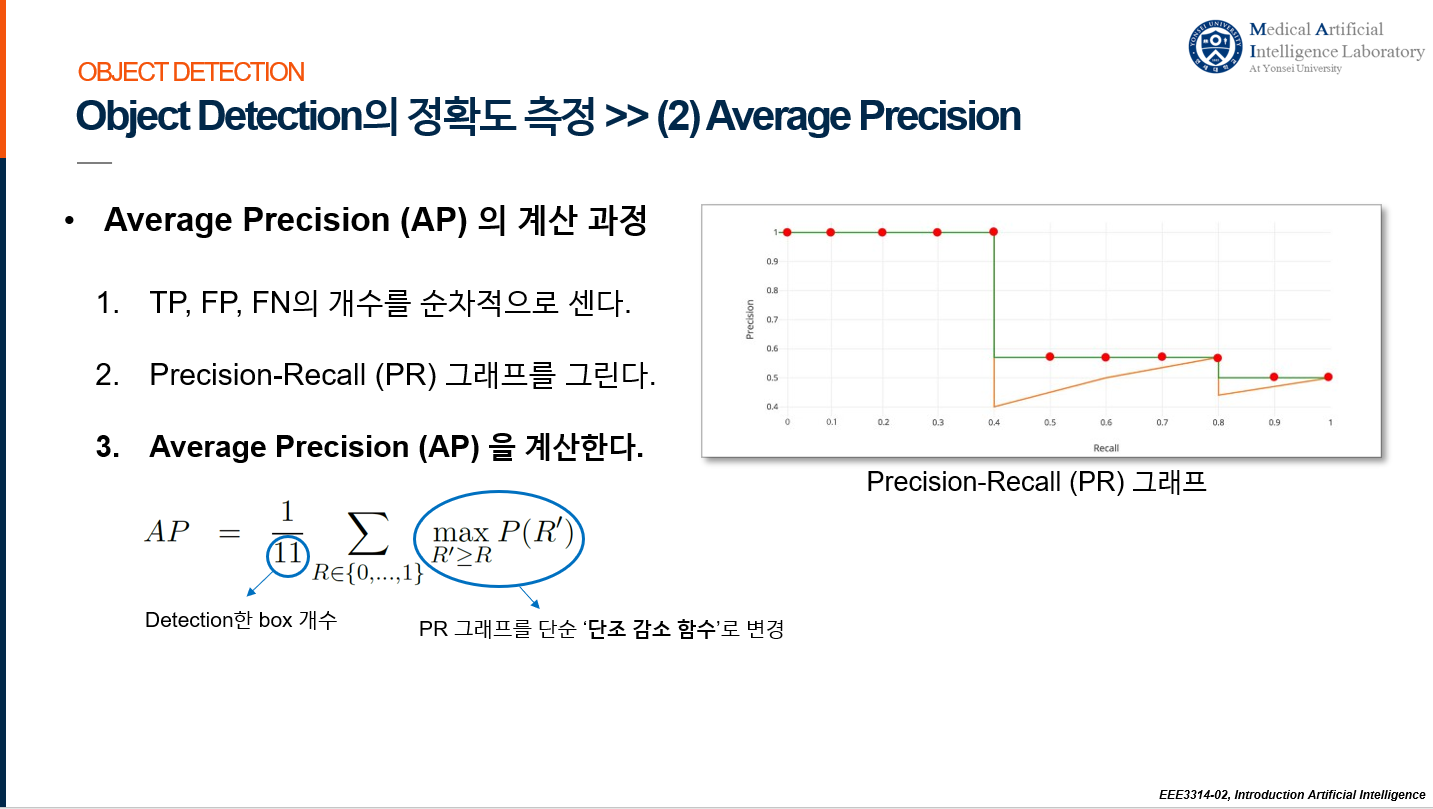


*** Detected box와 겹치는 GT box가 여러 개가 있을 때엔 더 IoU가 높은 GT box 를 예측한 box로 간주 ***

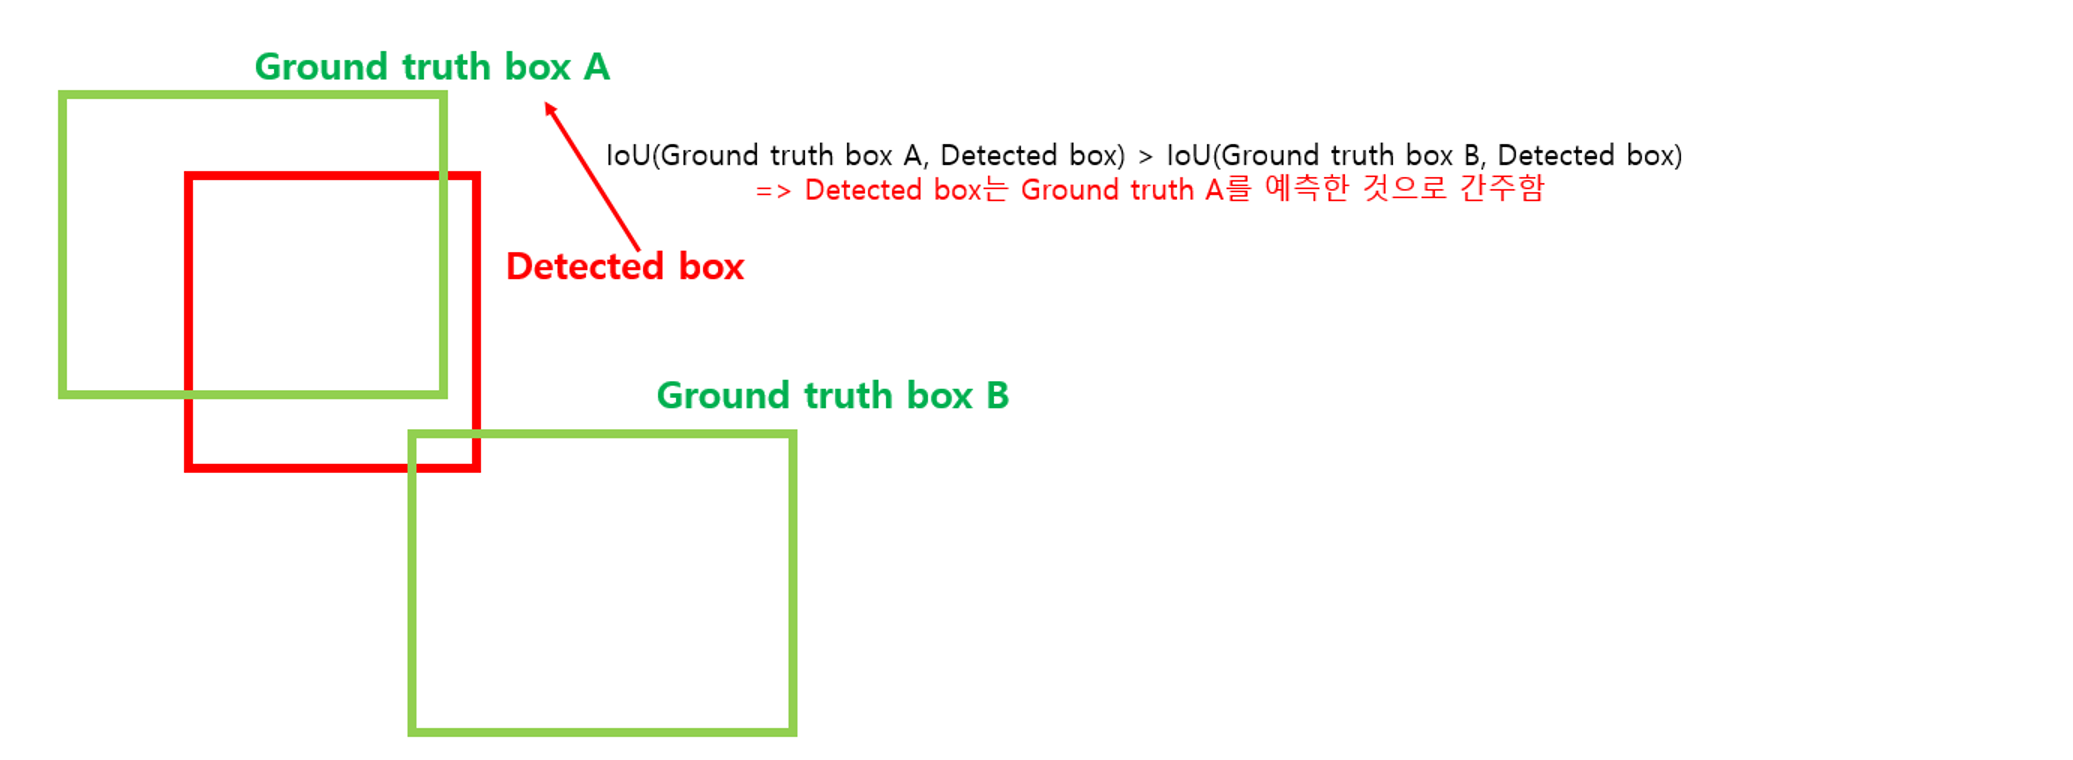

In [ ]:
from collections import Counter

def mean_average_precision(pred_boxes, true_boxes, iou_threshold=0.5, box_type="midpoint", num_classes=20):
    """
    predicted boxes
    mean average precision (mAP)를 계산한다.

    *** 입력 변수 ***
        pred_boxes (list): [image_index, predicted_class, class_score, x, y, w, h] (list)로 구성된 list
        true_boxes (list): [image_index, true_class, 1, x, y, w, h] (list)로 구성된 list
        iou_threshold (float): threshold where predicted bboxes is correct
        box_type (str): "midpoint" or "corners" used to specify bboxes
        num_classes (int): number of classes
    *** 출력 변수 ***
        float: mAP value across all classes given a specific IoU threshold 
    """

    # 클래스별 AP를 저장할 리스트
    average_precisions = []

    # zero division 방지를 위한 epsilon
    epsilon = 1e-6

    # 각 클래스 별로 접근
    for c in range(num_classes):
        detections = []
        ground_truths = []

        # class c에 속하는 prediction/true boxes 만 가져오기
        for detection in pred_boxes:
            if detection[1] == c:
                detections.append(detection)
        for true_box in true_boxes:
            if true_box[1] == c:
                ground_truths.append(true_box)

        # 각 sample image 별 ground truth의 박스 수 (dictionary)
        # ex) amount_boxes = {0:3, 1:5}
        amount_bboxes = Counter([gt[0] for gt in ground_truths])

        # dictionary 각 value에 해당 크기의 zeros로 초기화
        # ex) amount_bboxes = {0:torch.tensor[0,0,0], 1:torch.tensor[0,0,0,0,0]}
        for key, val in amount_bboxes.items():
            amount_bboxes[key] = torch.zeros(val)

        # class score에 따라 내림차순 정렬
        detections.sort(key=lambda x: x[2], reverse=True)

        # TP, FP matrix 초기화
        TP = torch.zeros((len(detections)))
        FP = torch.zeros((len(detections)))

        total_true_bboxes = len(ground_truths)
        
        # 만약 ground truth 박스가 이미지에 없으면 다음 이미지로 넘어가기
        if total_true_bboxes == 0:
            continue

        # 각 detected box에 대하여,
        for detection_idx, detection in enumerate(detections):
            # ground truth 박스 중에서 현재 detection box와 같은 이미지에 존재하는 박스 가져오기
            ground_truth_img = [
                bbox for bbox in ground_truths if bbox[0] == detection[0]
            ]

            # 현재 detection box가 속한 이미지에 있는 GT box의 개수
            num_gts = len(ground_truth_img)

            best_iou = 0

            # 현재 detection box에 대하여 모든 GT box와 IoU를 계산
            for idx, gt in enumerate(ground_truth_img):
                iou = calculate_iou(
                    torch.tensor(detection[3:]),
                    torch.tensor(gt[3:]),
                    box_type=box_type,
                )
                
                # 위 그림에 나온대로, 가장 IoU가 높은 GT box를 선택하는 과정
                if iou > best_iou:
                    best_iou = iou
                    best_gt_idx = idx

            if best_iou > iou_threshold:
                # iou가 threshold 보다 크고, and 아직 해당 GT box가 매칭된 적 없다면 -> TP // 그 이외의 경우 FP
                if amount_bboxes[detection[0]][best_gt_idx] == 0:
                    TP[detection_idx] = 1
                    # 좀 전에 매칭되었으므로 1로 바꿔줌
                    amount_bboxes[detection[0]][best_gt_idx] = 1
                else:
                    FP[detection_idx] = 1

            else:
                FP[detection_idx] = 1

        # AP 구하기 위해서 TP와 FP에 대해서 누적 합 (내림차순은 이미 위에서 되어있음)
        TP_cumsum = torch.cumsum(TP, dim=0)
        FP_cumsum = torch.cumsum(FP, dim=0)

        # print(TP_cumsum)
        # print(FP_cumsum)

        # precison, recall 값 구하기
        recalls = TP_cumsum / (total_true_bboxes + epsilon)
        precisions = TP_cumsum / (TP_cumsum + FP_cumsum + epsilon)
        precisions = torch.cat((torch.tensor([1]), precisions))
        recalls = torch.cat((torch.tensor([0]), recalls))
        
        # PR 그래프의 밑 면적을 구하기 위하여 trapz 함수 (적분) 사용
        average_precisions.append(torch.trapz(precisions, recalls))

    # 모든 class에 대하여 AP를 평균내어 mAP를 구함
    return sum(average_precisions) / len(average_precisions)

***랜덤 박스 생성 및 결과 보기***

In [ ]:
def generate_random_bboxes_train(num_boxes, num_classes, low, high, is_label=False):
  bboxes = []
  for i in range(num_boxes):
    prob = round(random.random(),3) if is_label==False else 1
    bboxes.append([i, random.randint(0, num_classes-1), prob, random.randint(low,high), random.randint(low,high), random.randint(low,high), random.randint(low,high)])
    # bboxes = [sample_idx, class_idx, class_prob, x, y, w, h]

  return bboxes

NUM_BOXES = 2
NUM_CLASSES = 1

pred_boxes = generate_random_bboxes_train(NUM_BOXES, NUM_CLASSES, 50, 100)
true_boxes = generate_random_bboxes_train(NUM_BOXES, NUM_CLASSES, 50, 100, is_label=True)

print(pred_boxes)
print(true_boxes)

mAP = mean_average_precision(pred_boxes, true_boxes, iou_threshold=0.5, box_type="midpoint", num_classes=NUM_CLASSES)
print(f"mAP = {mAP}")

print("predicted boxes")
draw_bboxes(pred_boxes, start_index=3)
print("true boxes")
draw_bboxes(true_boxes, start_index=3)